In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

The dataset being used has been made using SMOTE techniques and so, most of the data is not of very high quality and the level of predictions that can be expected from this is lower than what would be given of real-natural data.

Dataset Source: https://www2.math.uconn.edu/~valdez/data.html

In [2]:
df = pd.read_csv("/kaggle/input/main-dataset-insurity/telematics_syn-032021.csv")
df.head()

,Duration,Insured.age,Insured.sex,Car.age,Marital,Car.use,Credit.score,Region,Annual.miles.drive,Years.noclaims,...,Left.turn.intensity10,Left.turn.intensity11,Left.turn.intensity12,Right.turn.intensity08,Right.turn.intensity09,Right.turn.intensity10,Right.turn.intensity11,Right.turn.intensity12,NB_Claim,AMT_Claim
0,366,45,Male,-1,Married,Commute,609.0,Urban,6213.71,25,...,1.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,1,5100.171753
1,182,44,Female,3,Married,Commute,575.0,Urban,12427.42,20,...,58.0,24.0,11.0,1099.0,615.0,219.0,101.0,40.0,1,883.554840
2,184,48,Female,6,Married,Commute,847.0,Urban,12427.42,14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000
3,183,71,Male,6,Married,Private,842.0,Urban,6213.71,43,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000
4,183,84,Male,10,Married,Private,856.0,Urban,6213.71,65,...,2.0,0.0,0.0,325.0,111.0,18.0,4.0,2.0,0,0.000000


In [3]:
df.columns

Index(['Duration', 'Insured.age', 'Insured.sex', 'Car.age', 'Marital',
       'Car.use', 'Credit.score', 'Region', 'Annual.miles.drive',
       'Years.noclaims', 'Territory', 'Annual.pct.driven',
       'Total.miles.driven', 'Pct.drive.mon', 'Pct.drive.tue', 'Pct.drive.wed',
       'Pct.drive.thr', 'Pct.drive.fri', 'Pct.drive.sat', 'Pct.drive.sun',
       'Pct.drive.2hrs', 'Pct.drive.3hrs', 'Pct.drive.4hrs', 'Pct.drive.wkday',
       'Pct.drive.wkend', 'Pct.drive.rush am', 'Pct.drive.rush pm',
       'Avgdays.week', 'Accel.06miles', 'Accel.08miles', 'Accel.09miles',
       'Accel.11miles', 'Accel.12miles', 'Accel.14miles', 'Brake.06miles',
       'Brake.08miles', 'Brake.09miles', 'Brake.11miles', 'Brake.12miles',
       'Brake.14miles', 'Left.turn.intensity08', 'Left.turn.intensity09',
       'Left.turn.intensity10', 'Left.turn.intensity11',
       'Left.turn.intensity12', 'Right.turn.intensity08',
       'Right.turn.intensity09', 'Right.turn.intensity10',
       'Right.turn.intensity1

Our Prediction Metric in this dataset is Credit.score

In [4]:
df['Credit.score'].head()

0    609.0
1    575.0
2    847.0
3    842.0
4    856.0
Name: Credit.score, dtype: float64

Some basic analysis of the data before performing EDA techniques

In [5]:
df.isna().sum()

Duration                  0
Insured.age               0
Insured.sex               0
Car.age                   0
Marital                   0
Car.use                   0
Credit.score              0
Region                    0
Annual.miles.drive        0
Years.noclaims            0
Territory                 0
Annual.pct.driven         0
Total.miles.driven        0
Pct.drive.mon             0
Pct.drive.tue             0
Pct.drive.wed             0
Pct.drive.thr             0
Pct.drive.fri             0
Pct.drive.sat             0
Pct.drive.sun             0
Pct.drive.2hrs            0
Pct.drive.3hrs            0
Pct.drive.4hrs            0
Pct.drive.wkday           0
Pct.drive.wkend           0
Pct.drive.rush am         0
Pct.drive.rush pm         0
Avgdays.week              0
Accel.06miles             0
Accel.08miles             0
Accel.09miles             0
Accel.11miles             0
Accel.12miles             0
Accel.14miles             0
Brake.06miles             0
Brake.08miles       

There are no null values, so there will not be a need to drop rows or perform imputation

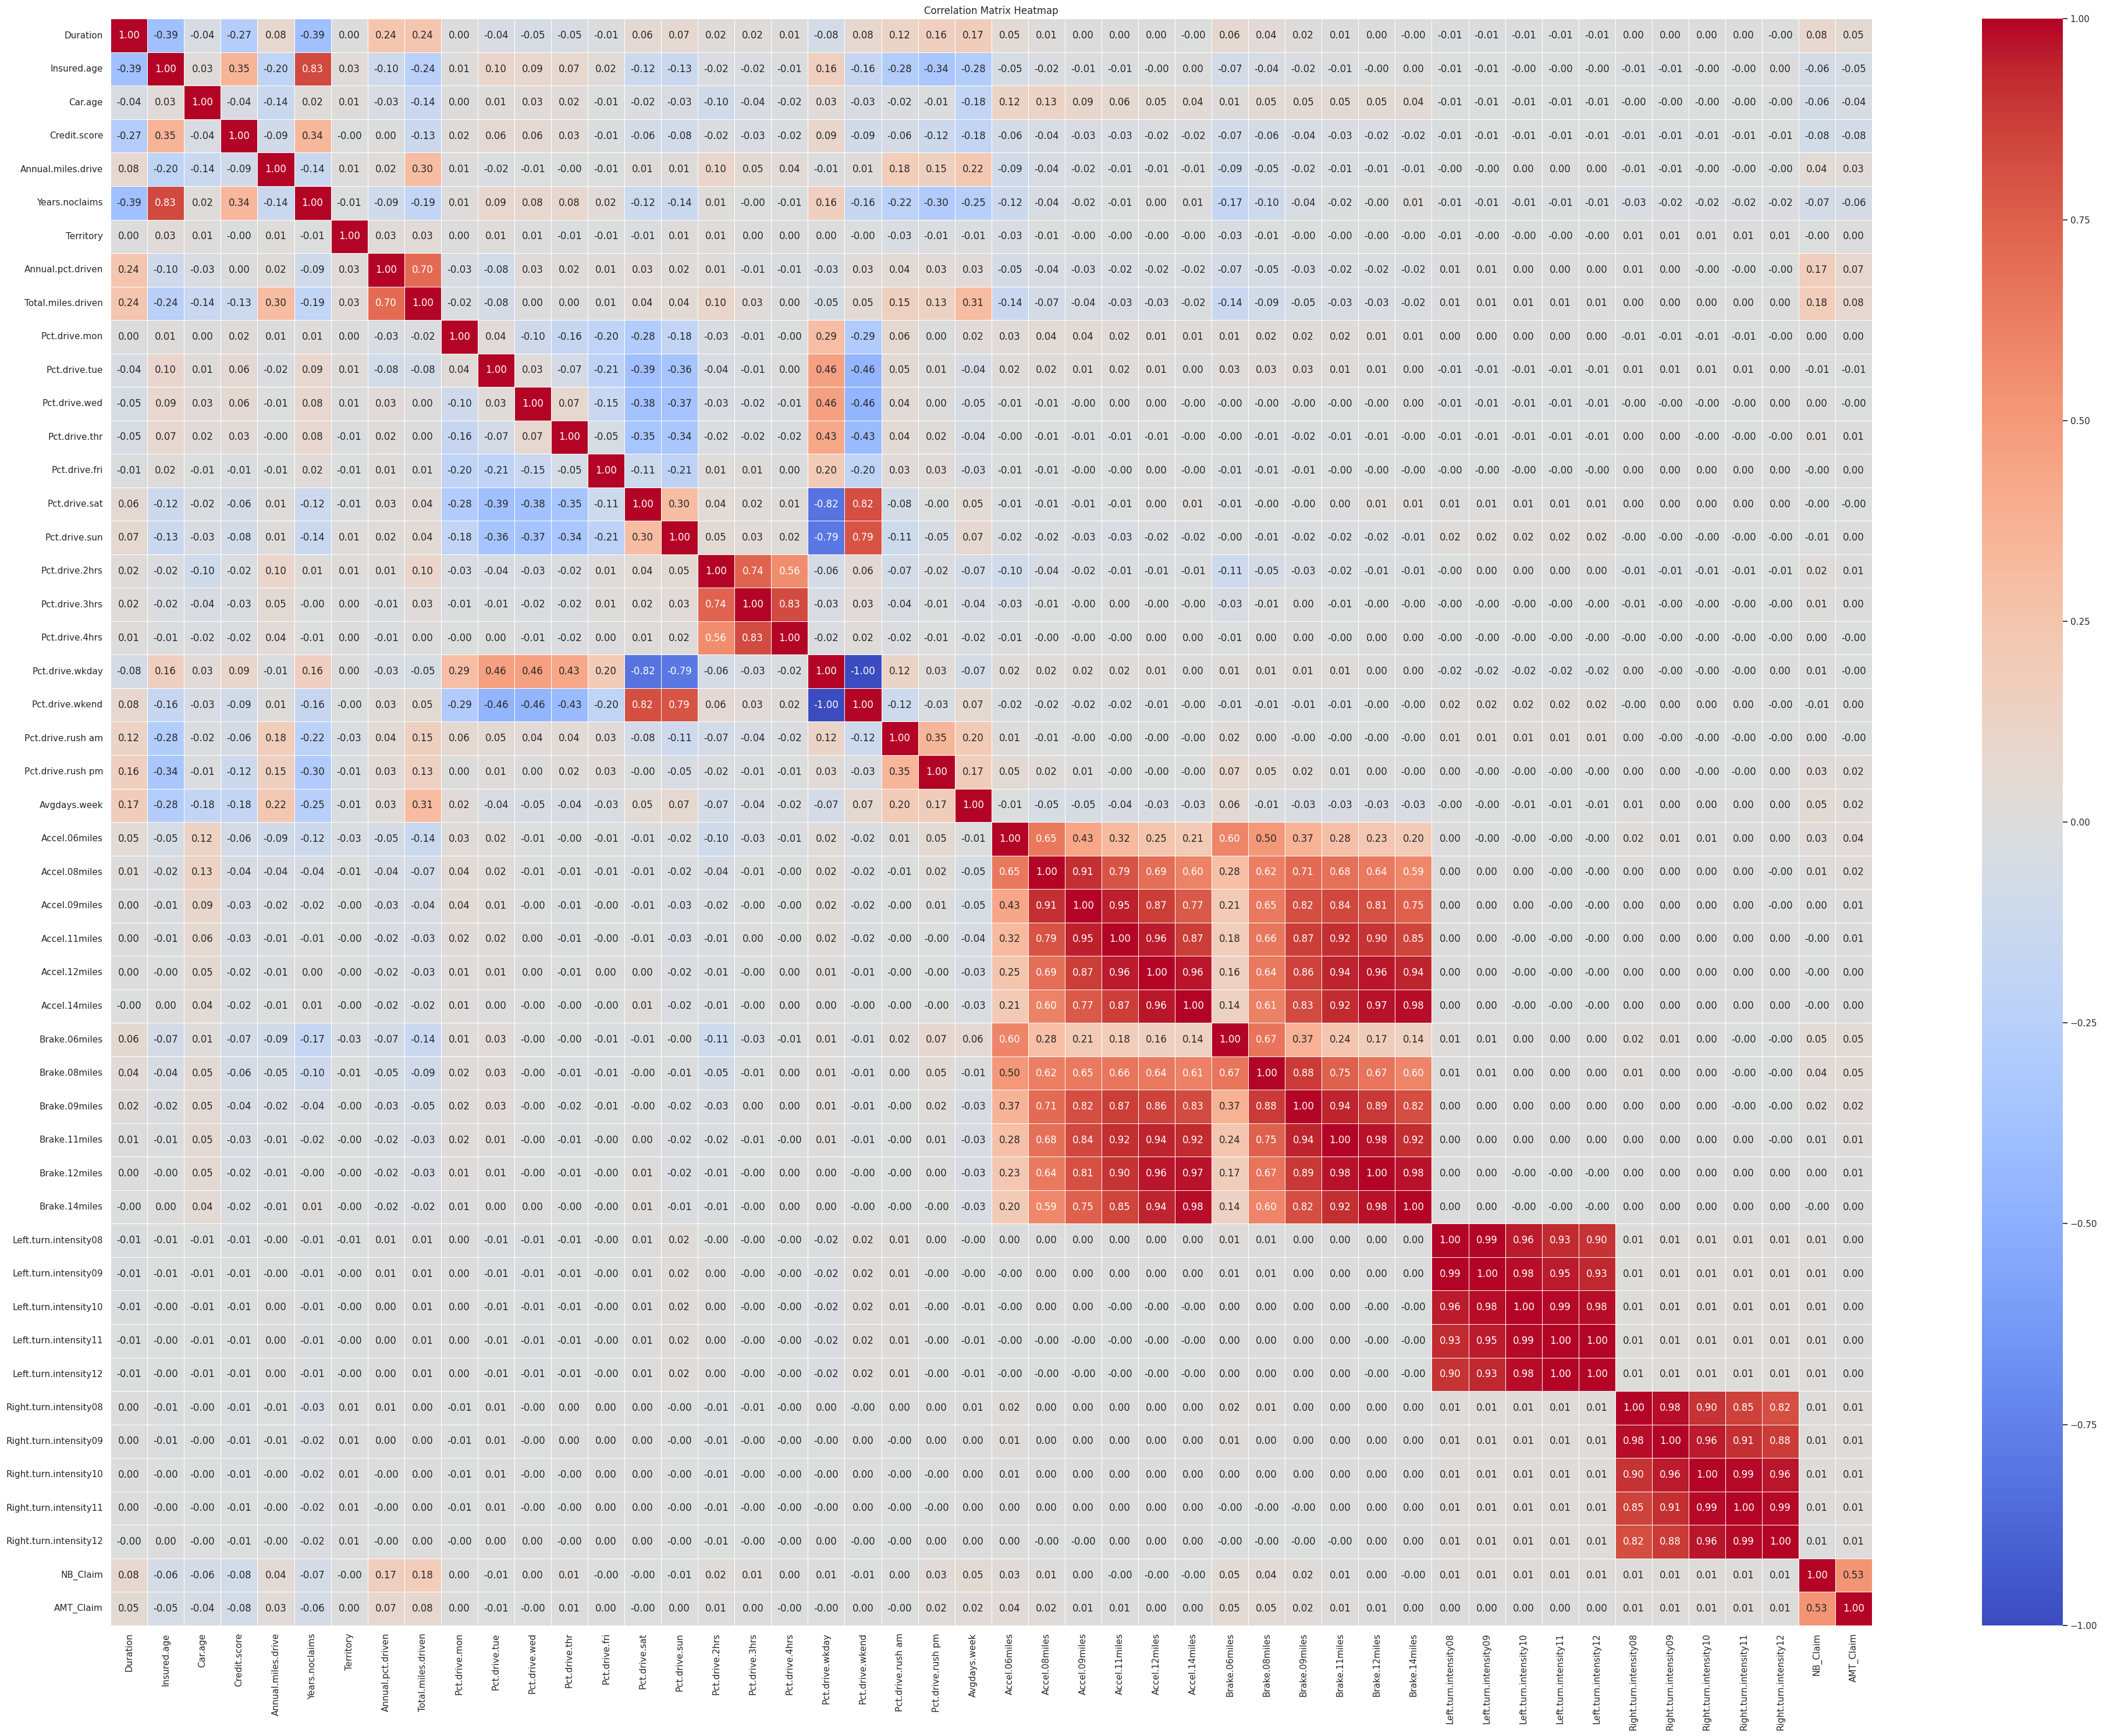

In [6]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(40, 30))
sns.set(style="white")
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()

We will drop the cols which have extremely high correlation (greater than 0.9)

The columns we will be dropping are:

Pct.drive.wkend,
Accel.08miles,
Accel.09miles,
Accel.11miles,
Accel.12miles,
Brake.11miles,
Brake.12miles,
Right.turn.intensity09,
Right.turn.intensity10,
Right.turn.intensity11

In [7]:
df.drop(['Pct.drive.wkend', 'Accel.08miles', 'Accel.09miles', 'Accel.11miles', 'Accel.12miles', 'Brake.11miles', 'Brake.09miles', 'Brake.12miles', 'Left.turn.intensity09', 'Left.turn.intensity10', 'Left.turn.intensity11','Right.turn.intensity09', 'Right.turn.intensity10', 'Right.turn.intensity11'], axis=1, inplace=True)

In [8]:
df.head()

,Duration,Insured.age,Insured.sex,Car.age,Marital,Car.use,Credit.score,Region,Annual.miles.drive,Years.noclaims,...,Accel.14miles,Brake.06miles,Brake.08miles,Brake.14miles,Left.turn.intensity08,Left.turn.intensity12,Right.turn.intensity08,Right.turn.intensity12,NB_Claim,AMT_Claim
0,366,45,Male,-1,Married,Commute,609.0,Urban,6213.71,25,...,0.0,78.0,10.0,0.0,7.0,0.0,3.0,0.0,1,5100.171753
1,182,44,Female,3,Married,Commute,575.0,Urban,12427.42,20,...,1.0,83.0,10.0,0.0,469.0,11.0,1099.0,40.0,1,883.554840
2,184,48,Female,6,Married,Commute,847.0,Urban,12427.42,14,...,6.0,152.0,14.0,6.0,0.0,0.0,0.0,0.0,0,0.000000
3,183,71,Male,6,Married,Private,842.0,Urban,6213.71,43,...,0.0,93.0,4.0,0.0,0.0,0.0,0.0,0.0,0,0.000000
4,183,84,Male,10,Married,Private,856.0,Urban,6213.71,65,...,0.0,27.0,2.0,0.0,80.0,0.0,325.0,2.0,0,0.000000


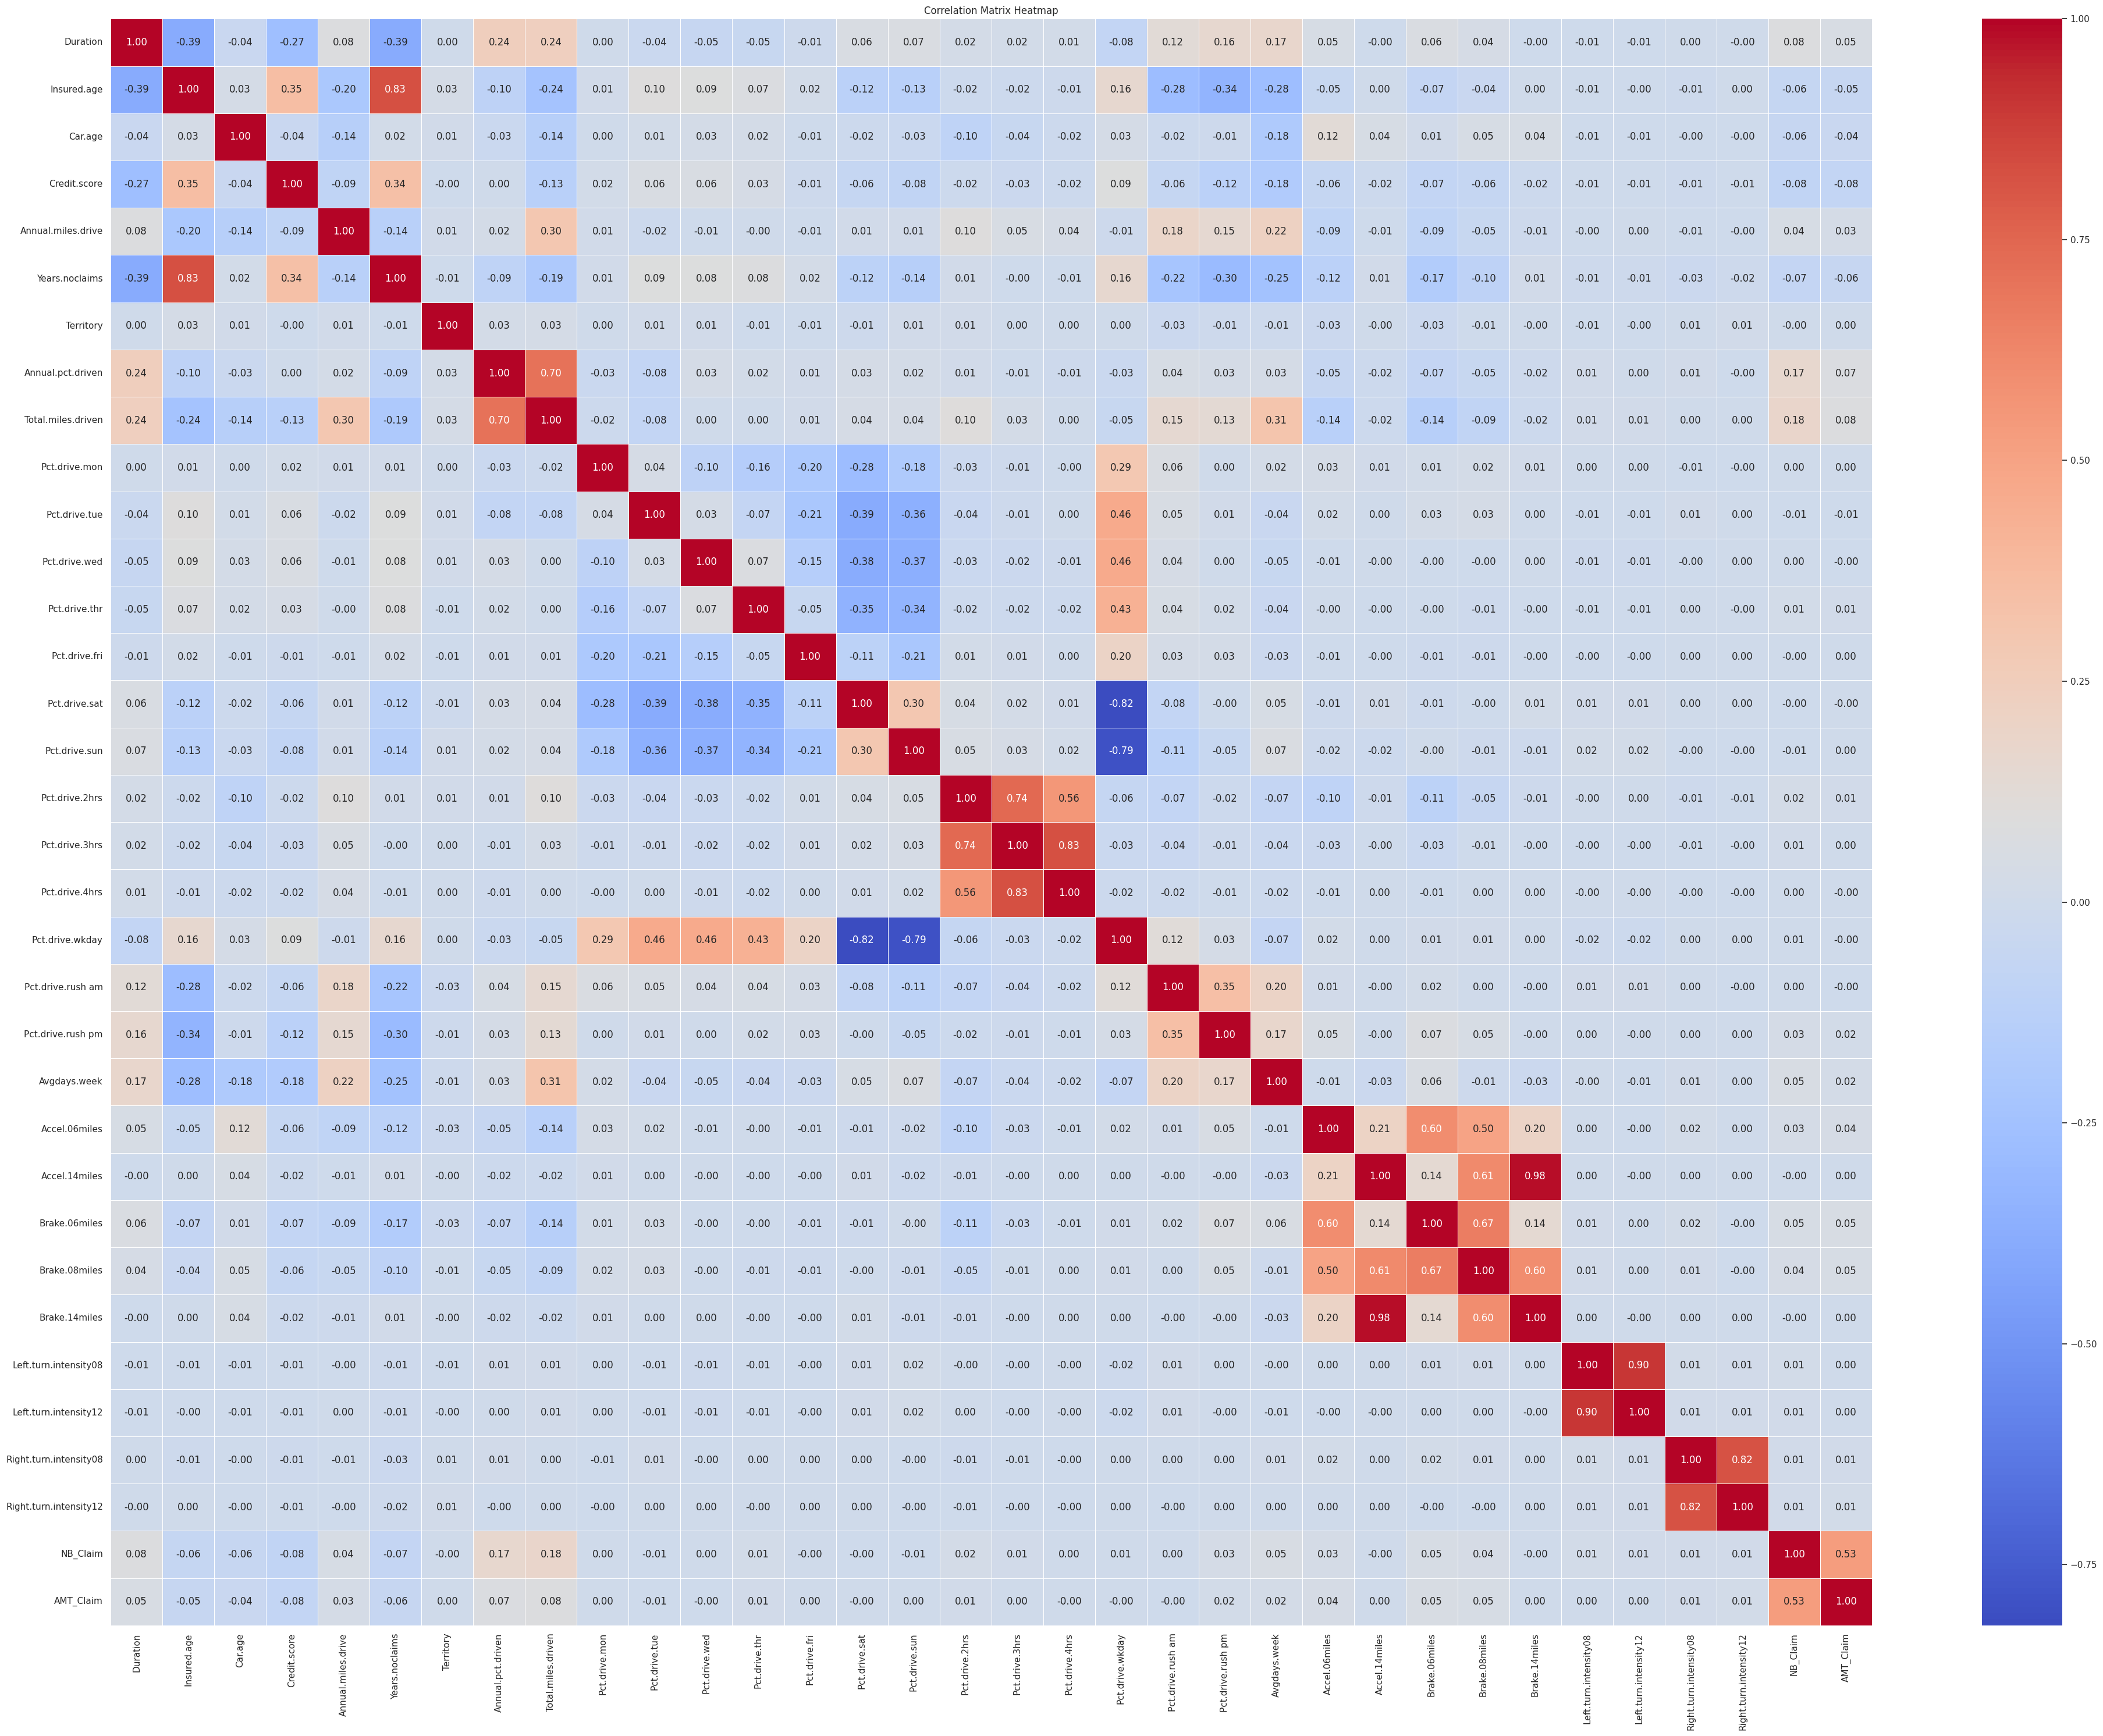

In [9]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(40, 30))
sns.set(style="white")
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


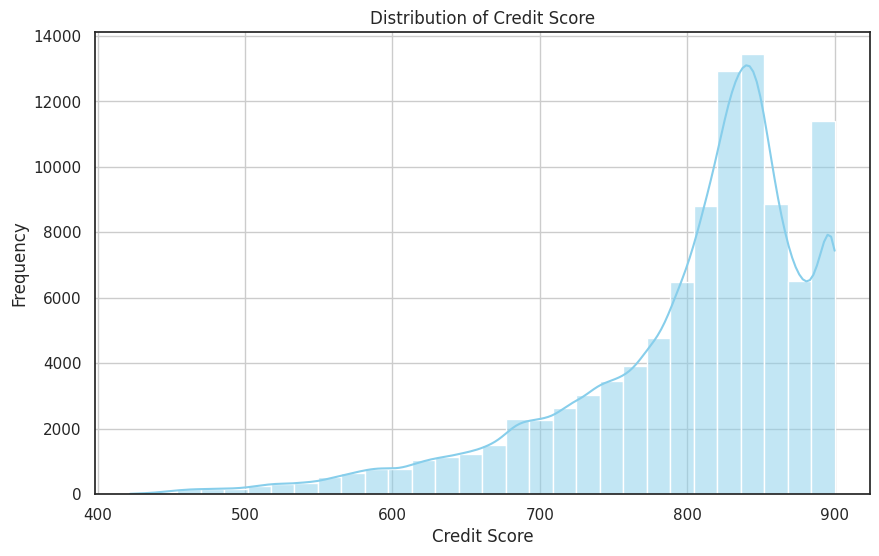

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Credit.score'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

We will be using XGBoost Model and Neural Network and review which of the two gives better results for regression-based task

In [11]:
def remove_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [12]:
df.shape

(100000, 38)

In [13]:
df = remove_outliers_iqr(df, ['Credit.score']) #Tree-Based models are most susceptible to overfitting on Outlier Data, to preent this, we will remove the outliers
df.shape

(94622, 38)

In [14]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
categorical_cols

Index(['Insured.sex', 'Marital', 'Car.use', 'Region'], dtype='object')

In [15]:
df['Region'].unique()

array(['Urban', 'Rural'], dtype=object)

In [16]:
df['Car.use'].unique()

array(['Commute', 'Private', 'Commercial', 'Farmer'], dtype=object)

In [17]:
df['Insured.sex'].unique()

array(['Female', 'Male'], dtype=object)

We will use One-hot Encoding for Region, Insured.sex, and Marital Status
and Ordinal Encoding for Car.use as the cols are divided into various classes, which can be shown in a increasing degree of priority

In [18]:
df = pd.get_dummies(df, columns=['Insured.sex', 'Marital', 'Region'], drop_first=True, dtype='int64')
df.head()

,Duration,Insured.age,Car.age,Car.use,Credit.score,Annual.miles.drive,Years.noclaims,Territory,Annual.pct.driven,Total.miles.driven,...,Brake.14miles,Left.turn.intensity08,Left.turn.intensity12,Right.turn.intensity08,Right.turn.intensity12,NB_Claim,AMT_Claim,Insured.sex_Male,Marital_Single,Region_Urban
2,184,48,6,Commute,847.0,12427.42,14,84,0.520548,3225.832512,...,6.0,0.0,0.0,0.0,0.0,0,0.0,0,0,1
3,183,71,6,Private,842.0,6213.71,43,30,0.065753,253.024528,...,0.0,0.0,0.0,0.0,0.0,0,0.0,1,0,1
4,183,84,10,Private,856.0,6213.71,65,70,0.441096,4374.379634,...,0.0,80.0,0.0,325.0,2.0,0,0.0,1,0,1
5,365,35,8,Commute,857.0,12427.42,18,43,0.520548,4872.078772,...,0.0,817.0,4.0,1217.0,7.0,0,0.0,1,1,1
6,366,23,8,Private,778.0,12427.42,7,52,0.550685,2692.065146,...,2.0,6.0,0.0,12.0,0.0,0,0.0,0,1,1


      Car.use  Credit.score
0  Commercial    795.460159
1     Commute    799.303098
2      Farmer    847.047619
3     Private    829.271567


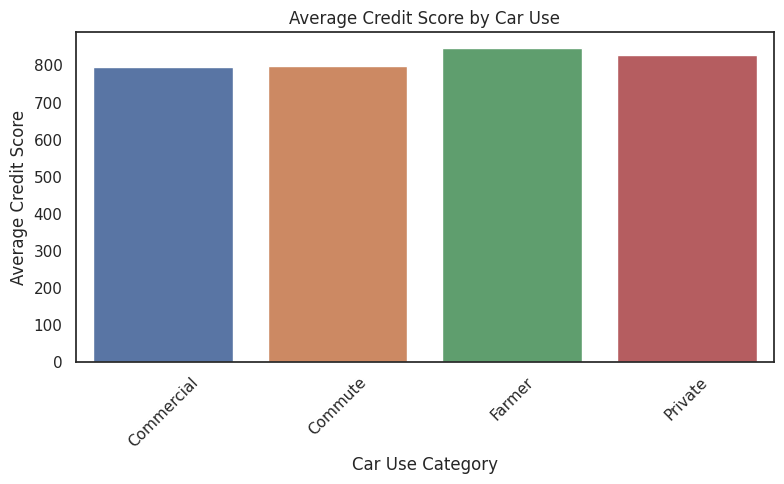

In [19]:
avg_credit_by_use = df.groupby('Car.use')['Credit.score'].mean().reset_index()

print(avg_credit_by_use)

plt.figure(figsize=(8, 5))
sns.barplot(data=avg_credit_by_use, x='Car.use', y='Credit.score')
plt.title('Average Credit Score by Car Use')
plt.ylabel('Average Credit Score')
plt.xlabel('Car Use Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
df['Car.use']

2           Commute
3           Private
4           Private
5           Commute
6           Private
            ...    
99995       Private
99996       Commute
99997       Commute
99998       Private
99999    Commercial
Name: Car.use, Length: 94622, dtype: object

In [21]:
mapping = {
    'Commercial': 0,
    'Commute': 1,
    'Private': 2,
    'Farmer': 3
}

df['Car.use'] = df['Car.use'].map(mapping).astype('int64')
df['Car.use']

2        1
3        2
4        2
5        1
6        2
        ..
99995    2
99996    1
99997    1
99998    2
99999    0
Name: Car.use, Length: 94622, dtype: int64

In [22]:
df.dtypes

Duration                    int64
Insured.age                 int64
Car.age                     int64
Car.use                     int64
Credit.score              float64
Annual.miles.drive        float64
Years.noclaims              int64
Territory                   int64
Annual.pct.driven         float64
Total.miles.driven        float64
Pct.drive.mon             float64
Pct.drive.tue             float64
Pct.drive.wed             float64
Pct.drive.thr             float64
Pct.drive.fri             float64
Pct.drive.sat             float64
Pct.drive.sun             float64
Pct.drive.2hrs            float64
Pct.drive.3hrs            float64
Pct.drive.4hrs            float64
Pct.drive.wkday           float64
Pct.drive.rush am         float64
Pct.drive.rush pm         float64
Avgdays.week              float64
Accel.06miles             float64
Accel.14miles             float64
Brake.06miles             float64
Brake.08miles             float64
Brake.14miles             float64
Left.turn.inte

In [23]:
df.head()

,Duration,Insured.age,Car.age,Car.use,Credit.score,Annual.miles.drive,Years.noclaims,Territory,Annual.pct.driven,Total.miles.driven,...,Brake.14miles,Left.turn.intensity08,Left.turn.intensity12,Right.turn.intensity08,Right.turn.intensity12,NB_Claim,AMT_Claim,Insured.sex_Male,Marital_Single,Region_Urban
2,184,48,6,1,847.0,12427.42,14,84,0.520548,3225.832512,...,6.0,0.0,0.0,0.0,0.0,0,0.0,0,0,1
3,183,71,6,2,842.0,6213.71,43,30,0.065753,253.024528,...,0.0,0.0,0.0,0.0,0.0,0,0.0,1,0,1
4,183,84,10,2,856.0,6213.71,65,70,0.441096,4374.379634,...,0.0,80.0,0.0,325.0,2.0,0,0.0,1,0,1
5,365,35,8,1,857.0,12427.42,18,43,0.520548,4872.078772,...,0.0,817.0,4.0,1217.0,7.0,0,0.0,1,1,1
6,366,23,8,2,778.0,12427.42,7,52,0.550685,2692.065146,...,2.0,6.0,0.0,12.0,0.0,0,0.0,0,1,1


In [24]:
df.columns

Index(['Duration', 'Insured.age', 'Car.age', 'Car.use', 'Credit.score',
       'Annual.miles.drive', 'Years.noclaims', 'Territory',
       'Annual.pct.driven', 'Total.miles.driven', 'Pct.drive.mon',
       'Pct.drive.tue', 'Pct.drive.wed', 'Pct.drive.thr', 'Pct.drive.fri',
       'Pct.drive.sat', 'Pct.drive.sun', 'Pct.drive.2hrs', 'Pct.drive.3hrs',
       'Pct.drive.4hrs', 'Pct.drive.wkday', 'Pct.drive.rush am',
       'Pct.drive.rush pm', 'Avgdays.week', 'Accel.06miles', 'Accel.14miles',
       'Brake.06miles', 'Brake.08miles', 'Brake.14miles',
       'Left.turn.intensity08', 'Left.turn.intensity12',
       'Right.turn.intensity08', 'Right.turn.intensity12', 'NB_Claim',
       'AMT_Claim', 'Insured.sex_Male', 'Marital_Single', 'Region_Urban'],
      dtype='object')

Let's perform some basic feature engineering to improve the score of the model

In [25]:
df['mileage_ratio'] = df['Annual.miles.drive'] / (df['Car.age'] + 1)
df['claims_per_year'] = df['NB_Claim'] / (df['Years.noclaims'] + 1)
df['log_total_miles'] = np.log1p(df['Total.miles.driven'])

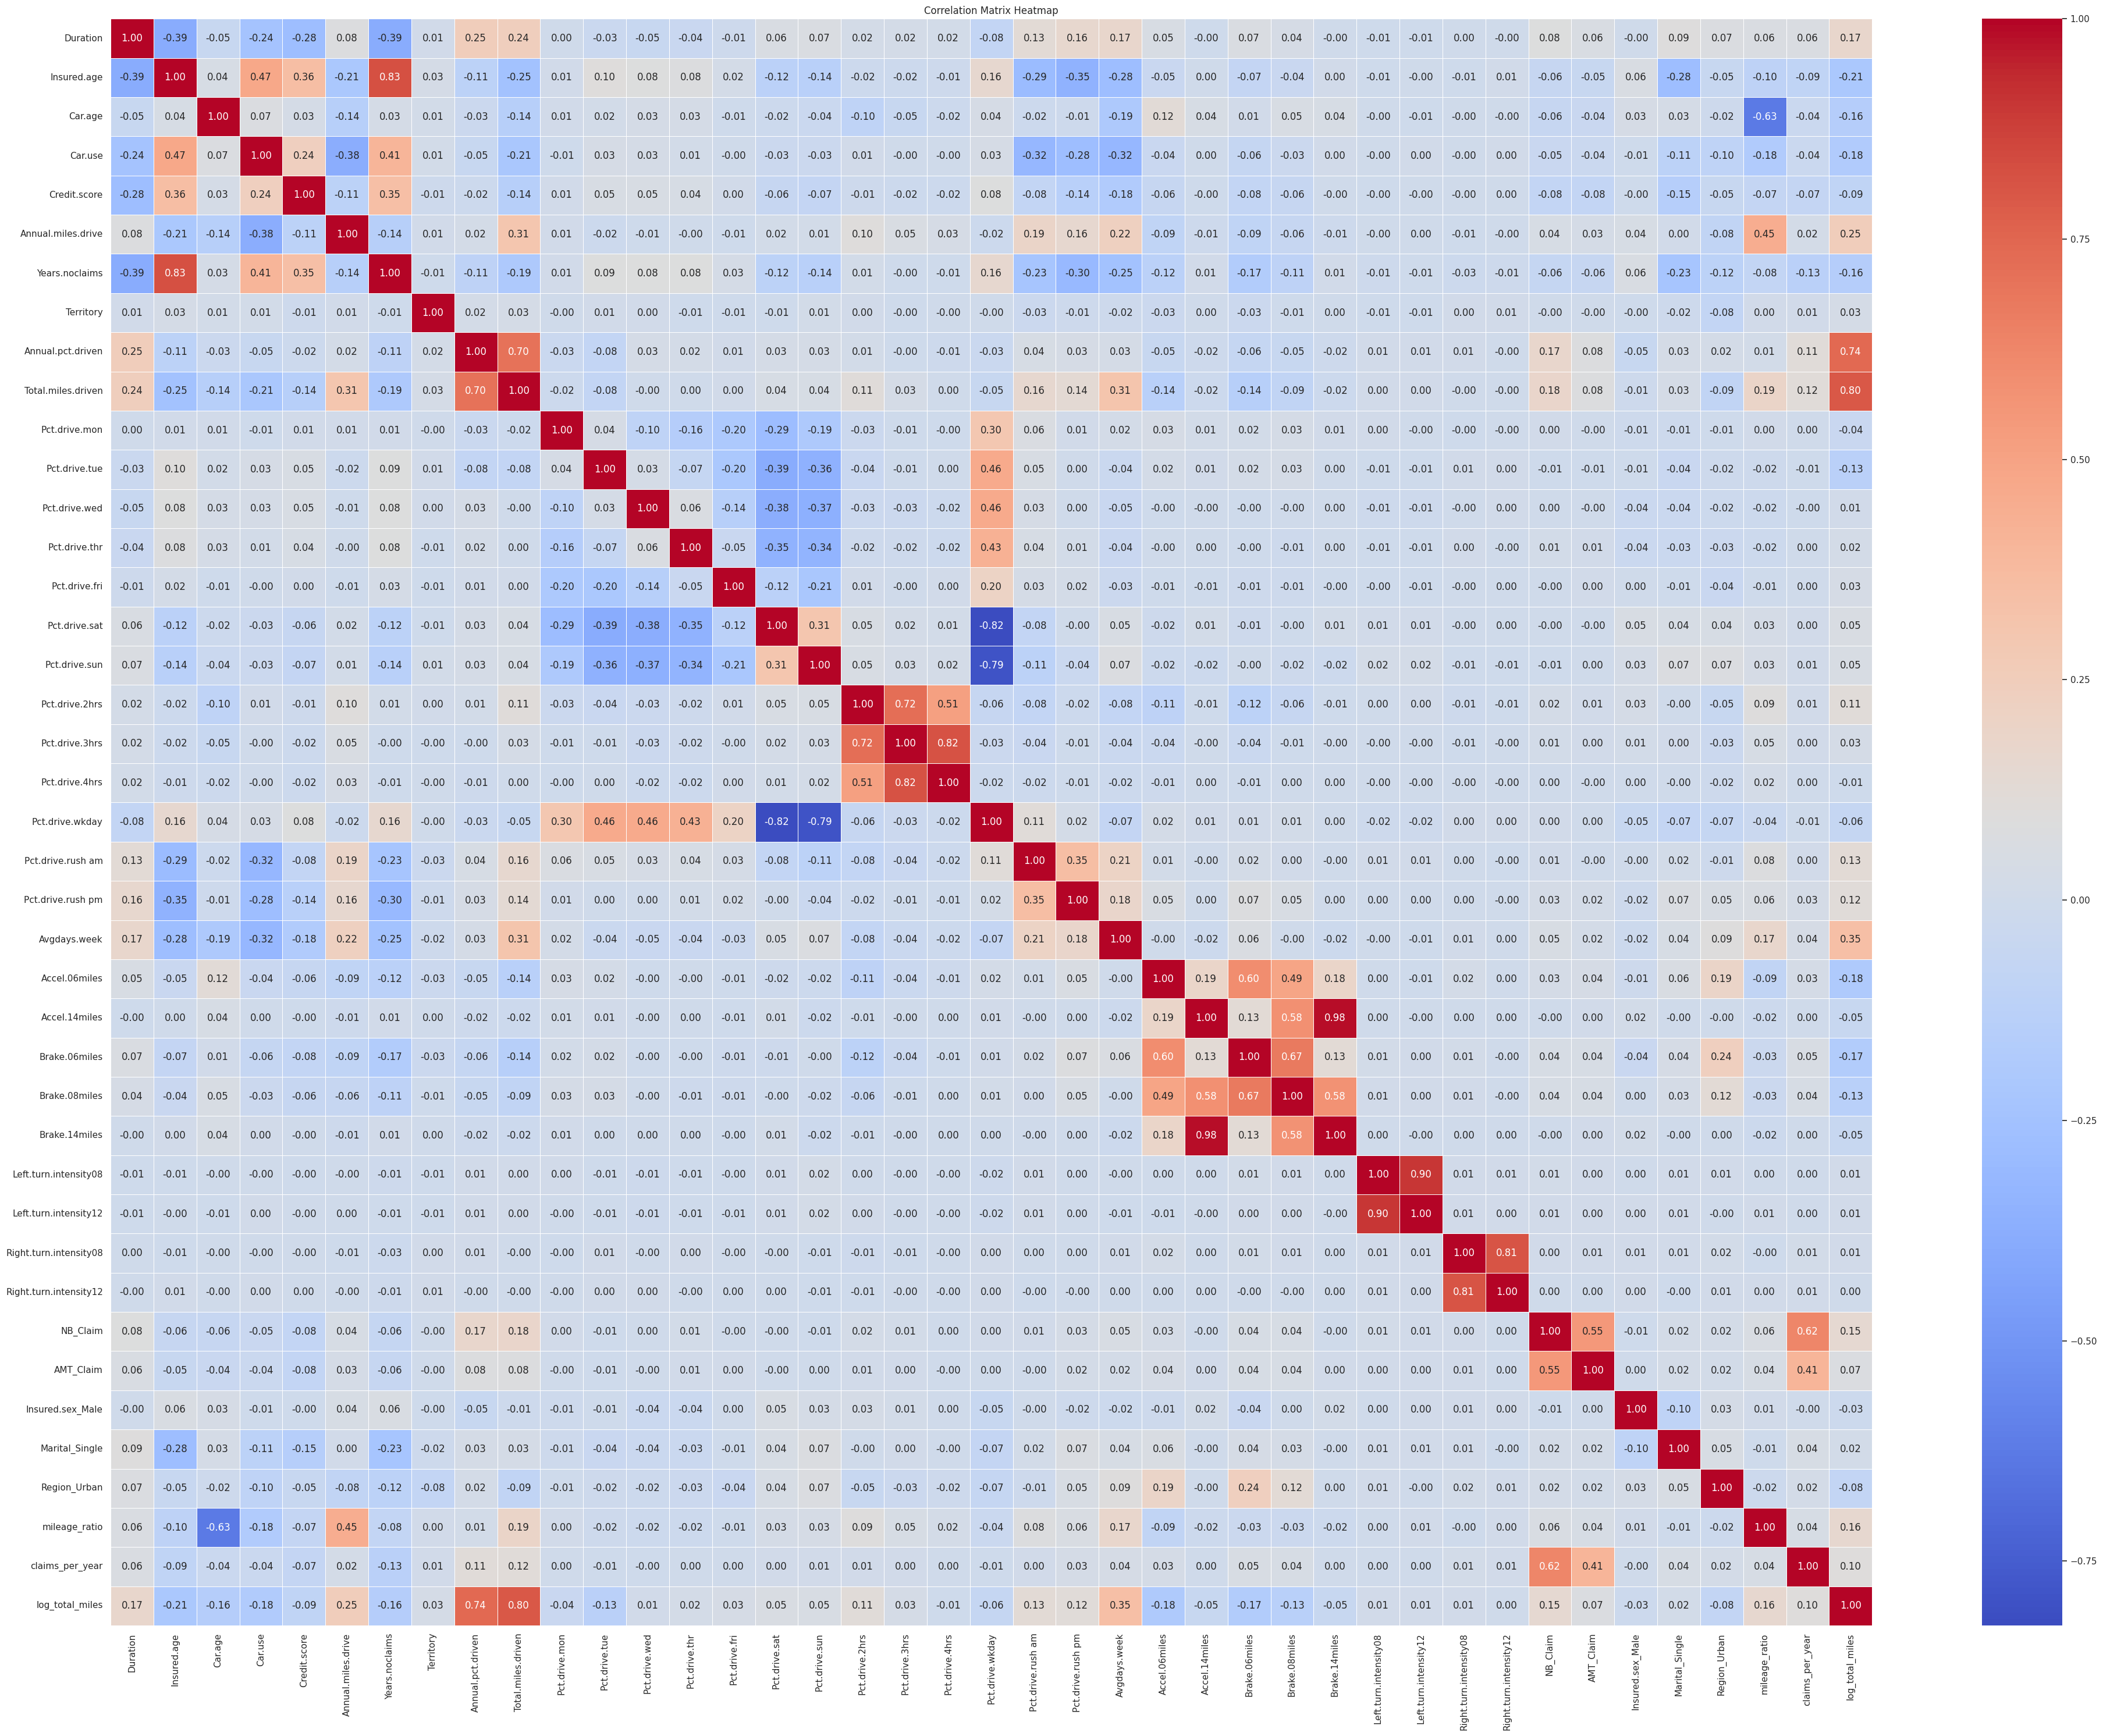

In [26]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(40, 30))
sns.set(style="white")
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()

Dividing the df into train and test to check the accuracy

In [27]:
df = df.apply(pd.to_numeric, errors='coerce')
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [28]:
df.isna().sum()

Duration                     0
Insured.age                  0
Car.age                      0
Car.use                      0
Credit.score                 0
Annual.miles.drive           0
Years.noclaims               0
Territory                    0
Annual.pct.driven            0
Total.miles.driven           0
Pct.drive.mon                0
Pct.drive.tue                0
Pct.drive.wed                0
Pct.drive.thr                0
Pct.drive.fri                0
Pct.drive.sat                0
Pct.drive.sun                0
Pct.drive.2hrs               0
Pct.drive.3hrs               0
Pct.drive.4hrs               0
Pct.drive.wkday              0
Pct.drive.rush am            0
Pct.drive.rush pm            0
Avgdays.week                 0
Accel.06miles                0
Accel.14miles                0
Brake.06miles                0
Brake.08miles                0
Brake.14miles                0
Left.turn.intensity08        0
Left.turn.intensity12        0
Right.turn.intensity08       0
Right.tu

In [29]:
df.fillna(-1, inplace=True)

In [27]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop("Credit.score", axis=1)
y = df["Credit.score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

Mean Squared Error: 4672.93
R2 Score: 0.33


In [33]:
import warnings
warnings.filterwarnings("ignore")

In [34]:
import optuna
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

def objective(trial):
    params = {
        'tree_method': 'gpu_hist',
        'predictor': 'gpu_predictor',
        'gpu_id': 0,
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 10),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 10),
        'lambda': trial.suggest_float("lambda", 1e-3, 10.0, log=True),
        'alpha': trial.suggest_float("alpha", 1e-3, 10.0, log=True),
        'max_depth': trial.suggest_int("max_depth", 3, 10),
        'min_child_weight': trial.suggest_int("min_child_weight", 1, 10),
    }

    model = XGBRegressor(**params, random_state=42, n_jobs=-1)
    score = cross_val_score(model, X_train, y_train, scoring="r2", cv=3).mean()
    return score

In [35]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

[I 2025-07-31 20:26:07,638] A new study created in memory with name: no-name-4f16a822-a95f-4fdb-b898-244e24796889
[I 2025-07-31 20:26:25,515] Trial 0 finished with value: 0.44803767504333253 and parameters: {'n_estimators': 208, 'max_depth': 12, 'learning_rate': 0.1893426287416694, 'subsample': 0.8958234695210905, 'colsample_bytree': 0.5995743851522342, 'gamma': 1.3071359187958502, 'reg_alpha': 8.783014593620056, 'reg_lambda': 0.3348025499059626, 'lambda': 0.38797486177686463, 'alpha': 0.008366207644566607, 'min_child_weight': 5}. Best is trial 0 with value: 0.44803767504333253.
[I 2025-07-31 20:26:30,405] Trial 1 finished with value: 0.29932594232003856 and parameters: {'n_estimators': 857, 'max_depth': 4, 'learning_rate': 0.1250491700536824, 'subsample': 0.586719033943429, 'colsample_bytree': 0.5011043366667765, 'gamma': 2.320593825004282, 'reg_alpha': 6.0536720901955245, 'reg_lambda': 2.4889503415774508, 'lambda': 0.3767009519114856, 'alpha': 0.9858243793848842, 'min_child_weight': 

In [33]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop("Credit.score", axis=1)
y = df["Credit.score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

xgb_model = XGBRegressor(
    n_estimators=621,
    max_depth=12,
    learning_rate=0.07000721657501419,
    subsample=0.9758145202867095,
    colsample_bytree=0.6691244420558508,
    gamma=3.586518129943995,
    reg_alpha=9.411205095271274,
    reg_lambda=1.2221850629895232,
    min_child_weight=6
)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

Mean Squared Error: 1720.94
R2 Score: 0.56


In [34]:
y_pred

array([777.7857, 796.8286, 844.5994, ..., 820.1897, 821.6811, 796.0231],
      dtype=float32)

In [36]:
import pickle

with open('insurity_model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)